In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import random

(600, 600, 3)


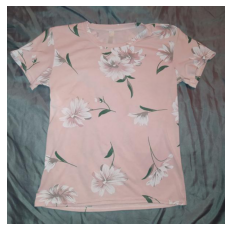

In [3]:
path_to_jpg_file = "/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg"
img = mpimg.imread(path_to_jpg_file)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
pixels = img.reshape((-1,3))

print(pixels.shape)

(360000, 3)


In [4]:
pixels[0]

array([56, 50, 52], dtype=uint8)

### Clustering for k=3

In [5]:
from sklearn.cluster import MiniBatchKMeans

In [6]:
n_clusters = 3
mb = MiniBatchKMeans(n_clusters).fit(pixels)

In [7]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = mb.labels_ 

In [8]:
centers_map_R = {i:mb.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:mb.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:mb.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,0,89.810615,95.76538,96.937877
1,58,52,54,0,89.810615,95.76538,96.937877
2,62,56,58,0,89.810615,95.76538,96.937877


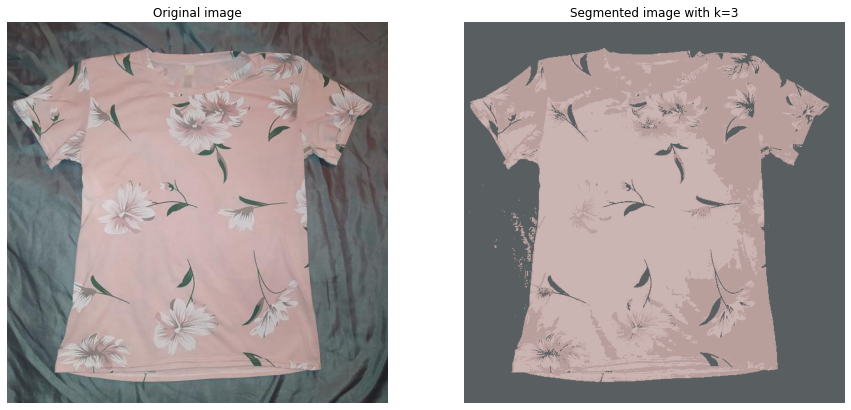

In [9]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

### Clustering for k=5

In [10]:
n_clusters = 5
mb = MiniBatchKMeans(n_clusters).fit(pixels)

c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = mb.labels_ 

centers_map_R = {i:mb.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:mb.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:mb.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,2,76.503321,77.466421,77.915129
1,58,52,54,2,76.503321,77.466421,77.915129
2,62,56,58,2,76.503321,77.466421,77.915129


In [1]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [17]:
mb= MiniBatchKMeans(n_clusters=5)
mb.fit(pixels)

MiniBatchKMeans(n_clusters=5)

In [18]:
label = mb.predict(pixels)

In [19]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, label)}')

calinski_harabasz_score: 2157106.9705918706


In [20]:
results2 = {}
for i in range(2,11):
    mb = MiniBatchKMeans(n_clusters=i, random_state=30)
    labels2 = mb.fit_predict(pixels)
    ch_index = metrics.calinski_harabasz_score(pixels, labels2)
    results2.update({i: ch_index})

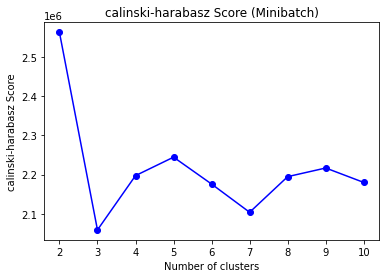

In [21]:
plt.plot(list(results2.keys()), list(results2.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("calinski-harabasz Score")
plt.title('calinski-harabasz Score (Minibatch)')
plt.show()

In [10]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, label)}')

davies_bouldin_score: 0.576524581883037


In [18]:
results2 = {}
for i in range(2,10):
    mb = MiniBatchKMeans(n_clusters=i, random_state=30)
    labels2 = mb.fit_predict(pixels)
    db_index = davies_bouldin_score(pixels, labels2)
    results2.update({i: db_index})

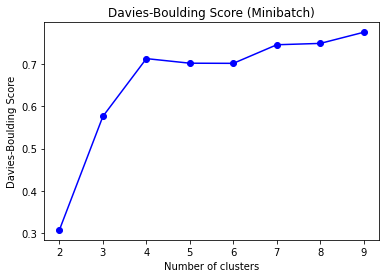

In [19]:
plt.plot(list(results2.keys()), list(results2.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Score")
plt.title('Davies-Boulding Score (Minibatch)')
plt.show()

In [11]:
print(f'Silhouette Score(n=3): {silhouette_score(pixels, label)}')

Silhouette Score(n=3): 0.6449110271588909


In [ ]:
results2 = {}
for i in range(2,11):
    mb = MiniBatchKMeans(n_clusters=i, random_state=30)
    labels2 = mb.fit_predict(pixels)
    ss_index = silhouette_score(pixels, labels2)
    results2.update({i: ss_index})

In [ ]:
plt.plot(list(results1.keys()), list(results1.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score score")
plt.title('silhouette-score Score (Minibatch)')
plt.show()